In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
# load data
admit = pd.read_csv('boston.csv')
admit.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [46]:
# split train test
from sklearn.model_selection import train_test_split

feature = df.drop(columns='medv')
target = df[['medv']]

# First splitting: pretrain and test
feature_df_train, feature_df_test, target_df_train, target_df_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [47]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.713187
2,zn,2.465631
3,indus,3.877855
4,chas,1.096674
5,nox,4.469150
6,rm,1.947809
7,age,2.989948
8,dis,4.168578
9,rad,7.658316
10,tax,8.943301


Features with high vif score:
1. rad
2. tax
3. nox
4. dis

## Correlation Plot

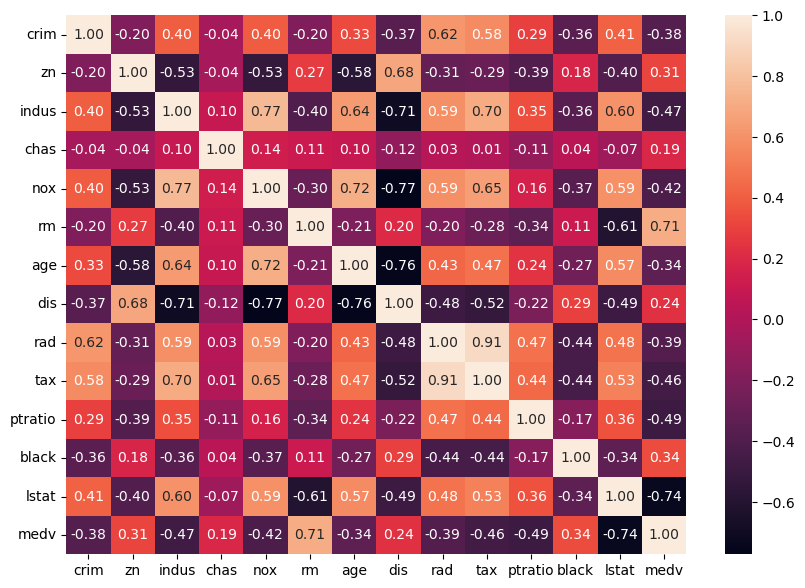

In [23]:
# heatmap correlation
df_train = pd.concat([feature_df_train, target_df_train], axis=1)
corr = df_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

I choose to retain `rad`. Therefore, I drop: `tax`

In [12]:
# drop redundant features
feature_df_train = feature_df_train.drop(columns=['tax'])
feature_df_test = feature_df_test.drop(columns=['tax'])

## Recheck VIF

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.713011
2,zn,2.272069
3,indus,3.283700
4,chas,1.084778
5,nox,4.426033
6,rm,1.934680
7,age,2.989897
8,dis,4.160822
9,rad,2.852653
10,ptratio,1.839747


nox and dis are still have high vif

I decided to drop 'nox' according to heatmap.

In [15]:
# drop redundant features
feature_df_train = feature_df_train.drop(columns=['nox'])
feature_df_test = feature_df_test.drop(columns=['nox'])

## Recheck VIF

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.705337
2,zn,2.267826
3,indus,2.908721
4,chas,1.079183
5,rm,1.920317
6,age,2.818560
7,dis,3.847355
8,rad,2.570792
9,ptratio,1.626674
10,black,1.318780


Good!

## Split Train - Validate - Test

In [24]:
# split train test
from sklearn.model_selection import train_test_split

feature = df.drop(columns='medv')
target = df[['medv']]

# First splitting: pretrain and test
feature_df_pretrain, feature_df_test, target_df_pretrain, target_df_test = train_test_split(feature, target, test_size=0.20, random_state=42)

# Second splitting: train and validation
feature_df_train, feature_df_validation, target_df_train, target_df_validation = train_test_split(feature_df_pretrain, target_df_pretrain, test_size=0.20, random_state=42)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## Drop Multicollinear Features

In [26]:
feature_df_train = feature_df_train.drop(columns=['tax','nox'])
feature_df_validation = feature_df_validation.drop(columns=['tax','nox'])
feature_df_test = feature_df_test.drop(columns=['tax','nox'])

## Train Multiple Models
with different alpha (lambda)

In [28]:
from sklearn.linear_model import Ridge

# train the model
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)

# define the model
# 4 models with 4 different alphas (lambda)
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_df_train, y_df_train)
ridge_reg_pointone.fit(X_df_train, y_df_train)
ridge_reg_one.fit(X_df_train, y_df_train)
ridge_reg_ten.fit(X_df_train, y_df_train)

Ridge(alpha=10, random_state=42)

## Find the best model (alpha)
Based on validation set

In [29]:
from sklearn.metrics import mean_squared_error

X_df_validation = feature_df_validation.to_numpy()
y_df_validation = target_df_validation.to_numpy()
y_df_validation = y_df_validation.reshape(len(y_df_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_df_validation)
    rmse = np.sqrt(mean_squared_error(y_df_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.910018083660948
RMSE of Ridge regression model with alpha = 0.1 is 4.909341813740431
RMSE of Ridge regression model with alpha = 1.0 is 4.902793924301717
RMSE of Ridge regression model with alpha = 10 is 4.852554684014988


I can see that Ridge with `alpha=10` has the smallest RMSE --> The best model

### Coefficients

In [36]:
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_df_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,14.626838
1,crim,-0.098172
2,zn,0.028737
3,indus,-0.105791
4,chas,1.860440
5,rm,4.707228
6,age,-0.011543
7,dis,-1.179954
8,rad,0.042378
9,ptratio,-0.758341


# Lasso

## Train Multiple Models

In [33]:
from sklearn.linear_model import Lasso

# train the model
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)

# define the model
# 4 models with 4 different alphas (lambda)
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_df_train, y_df_train)
lasso_reg_pointone.fit(X_df_train, y_df_train)
lasso_reg_one.fit(X_df_train, y_df_train)
lasso_reg_ten.fit(X_df_train, y_df_train)


Lasso(alpha=10, random_state=42)

## Find the best model (alpha)
Based on validation set

In [34]:
from sklearn.metrics import mean_squared_error

X_df_validation = feature_df_validation.to_numpy()
y_df_validation = target_df_validation.to_numpy()
y_df_validation = y_df_validation.reshape(len(y_df_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_df_validation)
    rmse = np.sqrt(mean_squared_error(y_df_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 4.90617198965214
RMSE of Lasso regression model with alpha = 0.1 is 4.886477755903591
RMSE of Lasso regression model with alpha = 1.0 is 4.83300631441224
RMSE of Lasso regression model with alpha = 10 is 5.436636308051356


I can see that Lasso with `alpha=1.0` has the smallest RMSE --> The best model

### Coefficients

In [37]:
lasso_best = lasso_reg_one

coef_df_lasso = pd.DataFrame({
    'feature':['intercept'] + feature_df_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df_lasso

,feature,coefficient
0,intercept,26.245932
1,crim,-0.065050
2,zn,0.019857
3,indus,-0.034062
4,chas,0.000000
5,rm,2.430126
6,age,0.023128
7,dis,-0.542674
8,rad,0.023055
9,ptratio,-0.740235


as I see from the two models (Ridge_best and Lasso_best), Lasso_best has the smallest RSME --> the best model

### Diagnostic Study

In [48]:
from sklearn.metrics import r2_score

y_predict_train = lasso_best.predict(X_df_train)

print('R-squared for training data is {}'.format(r2_score(y_df_train, y_predict_train)))

R-squared for training data is 0.705563907906898


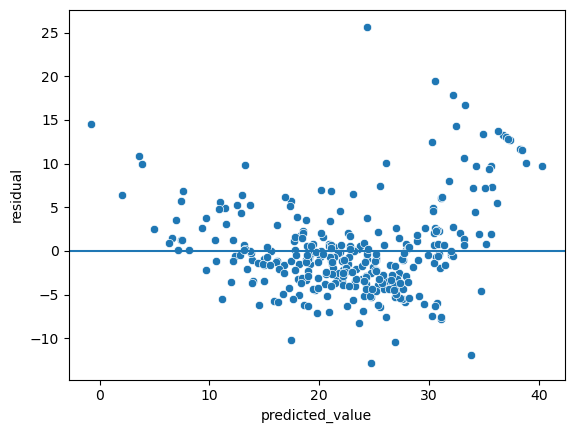

In [49]:
# calculate residuals
residual = y_df_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

Asumsi:
1. Linear relationship: OK. Garis horizontal y=0 cukup merepresentasikan keseluruhan titik residual.
2. Variance stable: NO. Variasinya itu dari Kecil (di bagian kiri) ke Lebar (di bagian kanan)
3. Independent residual: OK. Tidak ada pattern yang mencolok pada residuals yang berdekatan. 

## Model Evaluation
(Lasso)

### Training Error

In [38]:
# prepare prediction result on train data
y_predict_train = lasso_best.predict(X_df_train)

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_df_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_df_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_df_train, y_predict_train)))

RMSE for training data is 5.171380087180623
MAE for training data is 3.698950906829605
MAPE for training data is 0.17637438515892404


### Testing Error

In [40]:
# prepare prediction result on test data
X_df_test = feature_df_test.to_numpy()
y_predict_test = lasso_best.predict(X_df_test)

# ground truth target
y_df_test = target_df_test.to_numpy()
y_df_test = y_df_test.reshape(len(y_df_test),)

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_df_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_df_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_df_test, y_predict_test)))

RMSE for testing data is 5.149061786449902
MAE for testing data is 3.443446023973282
MAPE for testing data is 0.18255166446890544


In [43]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_error(y_df_test, y_predict_test)
mean_absolute_percentage_error(y_df_test, y_predict_test)

0.18255166446890544

### The Result shows that Model is 'Just Right', because the training error and testing error values are considered 'pretty similar'.